# **OPTIMIZACIÓN DE CLUSTERINGG**

# **GRIDSEARCH**

In [ ]:
# Definir el modelo y el espacio de búsqueda
model = SVC()
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

In [ ]:
# Configurar GridSearchCV con validación cruzada de 5 pliegues
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

In [ ]:
# Mostrar los mejores parámetros y el mejor puntaje
print("Mejores Hiperparámetros:", grid_search.best_params_)
print("Mejor Precisión en Entrenamiento:", grid_search.best_score_)

# Evaluar en el conjunto de prueba
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Precisión en el conjunto de prueba:", accuracy_score(y_test, y_pred))

### Explicación De Ejemplo

1. **`C`**: controla el margen de clasificación. Valores altos de `C` buscan minimizar los errores de clasificación, mientras que valores bajos permiten márgenes más amplios.
2. **`gamma`**: controla la influencia de los puntos de datos individuales. Un `gamma` alto significa que cada punto tiene un alcance corto y actúa como una métrica de distancia muy local, mientras que uno bajo considera un rango más amplio.
3. **`kernel`**: en este caso, seleccionamos el kernel radial (`'rbf'`) para SVM, que funciona bien en problemas de clasificación no lineales.

Este ejemplo muestra cómo ajustar los hiperparámetros de un modelo SVM para optimizar la precisión de la clasificación usando Grid Search.

# **K-Fold**

In [ ]:
from sklearn.model_selection import KFold, cross_val_score

In [ ]:
# Definir el modelo (Support Vector Classifier en este caso)
model = SVC(kernel='linear', C=1)

# Configurar K-Fold Cross-Validation con 5 pliegues
kf = KFold(n_splits=10, shuffle=True, random_state=42)

In [ ]:
# Ejecutar la validación cruzada y calcular la precisión
scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

# Mostrar las puntuaciones de precisión en cada pliegue
print("Precisión en cada pliegue:", scores)
print("Precisión promedio:", scores.mean())
print("Desviación estándar:", scores.std())

Explicación

- **`scores`**: guarda la precisión de cada pliegue.
- **`scores.mean()`**: proporciona la precisión promedio en todos los pliegues, útil para comparar modelos.
- **`scores.std()`**: mide la variación de las puntuaciones, indicando la estabilidad del modelo.

Experimentar con otros Modelos (Opcional)

Para probar otros modelos, puedes cambiar `model = SVC(...)` por otros algoritmos, como `LogisticRegression`, `RandomForestClassifier`, etc.

**Sensibilidad de K**

In [ ]:
#Definimos el modelo a evaluar
def get_model():
	model = LogisticRegression()
	return model

In [ ]:
# Devuelve las puntuaciones de evaluación del modelo
def evaluate_model(cv):
	# Obtenemos el dataset
	X, y = get_dataset()
	# Obtenemos el modelo
	model = get_model()
	# Evaluamos el modelo con cross validation
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	# Devolvemos las puntuaciones
	return mean(scores), scores.min(), scores.max()

Evaluamos con el metodo Leave One Out

In [ ]:
# Calcular las conduciones ideales de test
ideal, _, _ = evaluate_model(LeaveOneOut())
print('Ideal: %.3f' % ideal)

In [ ]:
# Definimos los dobleces a probar
folds = range(2,31)

In [ ]:
# Registramos la media y el mínimo/máximo de cada conjunto de resultados
means, mins, maxs = list(),list(),list()
# Evaluamos cada valor k
for k in folds:
	# Definimos las condiciones del test
	cv = KFold(n_splits=k, shuffle=True, random_state=1)
	# Evaluamos el valor de k
	k_mean, k_min, k_max = evaluate_model(cv)
	# Imprimimos el rendimiento
	print('> k=%d, accuracy: mean=%.3f, min=%.3f, max=%.3f)' % (k, k_mean, k_min, k_max))
	# Guardamos la media de la precisión
	means.append(k_mean)
  # Guardamos mínimo y máximo en relación con la media
	mins.append(k_mean - k_min)
	maxs.append(k_max - k_mean)

### **Evaluación con multiples Modelos**

In [ ]:
# Importamos las bibliotecas necesarias
from numpy import mean
from numpy import isnan
from numpy import asarray
from numpy import polyfit
from scipy.stats import pearsonr
from matplotlib import pyplot
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [ ]:
# Obtenemos una lista de los modelos a evaluar
def get_models():
	models = list()
	models.append(LogisticRegression())
	models.append(RidgeClassifier())
	models.append(SGDClassifier())
	models.append(PassiveAggressiveClassifier())
	models.append(KNeighborsClassifier())
	models.append(DecisionTreeClassifier())
	models.append(ExtraTreeClassifier())
	models.append(LinearSVC())
	models.append(SVC())
	models.append(GaussianNB())
	models.append(AdaBoostClassifier())
	models.append(BaggingClassifier())
	models.append(RandomForestClassifier())
	models.append(ExtraTreesClassifier())
	models.append(GaussianProcessClassifier())
	models.append(GradientBoostingClassifier())
	models.append(LinearDiscriminantAnalysis())
	models.append(QuadraticDiscriminantAnalysis())
	return models

In [ ]:
# Evaluamos el modelo con la condición dada
def evaluate_model(cv, model):
	# Obtenemos el dataset
	X, y = get_dataset()
	# Evaluamos el modelo
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	# Devolvemos los resultados
	return mean(scores)

In [ ]:
import pandas as pd

df_acc = pd.DataFrame(columns=["modelo", "acc_leaveoneout", "acc_k10"])

In [ ]:
# Definimos las condiciones de test
ideal_cv = LeaveOneOut()
cv = KFold(n_splits=10, shuffle=True, random_state=1)
# Obtenemos la lista de modelos a considerar
models = get_models()
# Obtenemos los resultados
ideal_results, cv_results = list(), list()
# Evaluamos cada modelo
for model in models:
  # Evaluamos el modelo usado para cada condición de prueba
	cv_mean = evaluate_model(cv, model)
	ideal_mean = evaluate_model(ideal_cv, model)
	# Revisamos resultados no válidos
	if isnan(cv_mean) or isnan(ideal_mean):
		continue
	# Guardamos resultados
	cv_results.append(cv_mean)
	ideal_results.append(ideal_mean)
	# Imprimimos el progreso de nuestra evaluación
	df_acc.loc[len(df_acc)] = [type(model).__name__, ideal_mean, cv_mean]


In [ ]:
df_acc.sort_values(by="acc_leaveoneout", ascending=False)

In [ ]:
# Calculamos la coorelación entre cada condición de test
corr, _ = pearsonr(cv_results, ideal_results)
print('Correlation: %.3f' % corr)

# **SILHOUTTE**

Puntaje promedio de silueta: 0.6844837346859131


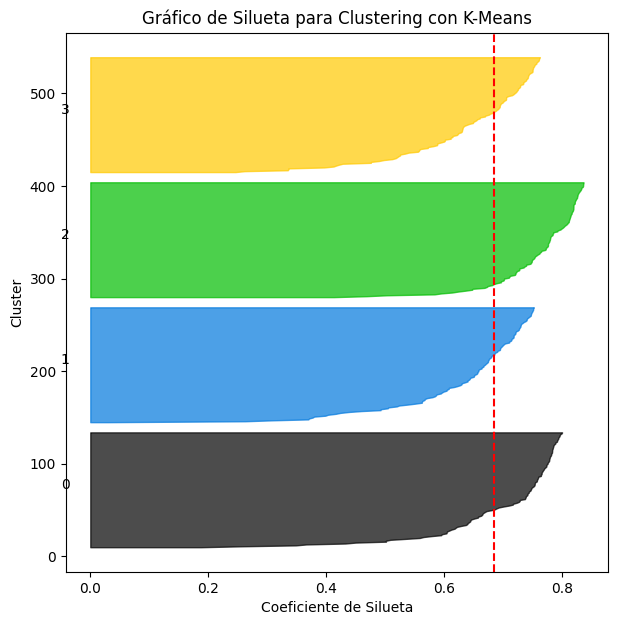

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.datasets import make_blobs

# Generar datos de ejemplo
X, _ = make_blobs(n_samples=500, centers=4, cluster_std=0.60, random_state=0)

# Configurar el modelo de K-Means con 4 clusters
kmeans = KMeans(n_clusters=4, random_state=0)
labels = kmeans.fit_predict(X)

# Calcular el puntaje de silueta promedio para todos los puntos
silhouette_avg = silhouette_score(X, labels)
print("Puntaje promedio de silueta:", silhouette_avg)

# Calcular el coeficiente de silueta para cada punto
sample_silhouette_values = silhouette_samples(X, labels)

# Graficar el puntaje de silueta
fig, ax = plt.subplots(figsize=(7, 7))
y_lower = 10
for i in range(4):
    # Obtener los coeficientes de silueta para el cluster i
    ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
    ith_cluster_silhouette_values.sort()

    # Calcular el tamaño de cada cluster
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    # Colorear la silueta de cada cluster
    color = plt.cm.nipy_spectral(float(i) / 4)
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

    # Etiquetar el cluster
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

# Configuraciones de la gráfica
ax.set_title("Gráfico de Silueta para Clustering con K-Means")
ax.set_xlabel("Coeficiente de Silueta")
ax.set_ylabel("Cluster")
ax.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.show()


# **CALINSKI-HARABASZ**

El **índice de Calinski-Harabasz** (también conocido como **índice de la razón de varianza** o **Calinski-Harabasz Score**) es una medida de la **calidad de una agrupación** en análisis de clusters. Al igual que el coeficiente de silueta, este índice se utiliza para evaluar qué tan bien los datos han sido agrupados. Se calcula en función de la **proximidad interna** de los puntos dentro de un cluster y la **distancia** entre los diferentes clusters, comparando la dispersión intra-cluster con la dispersión inter-cluster.

### Definición y Fórmula del Índice de Calinski-Harabasz

El índice de Calinski-Harabasz se calcula como:


donde:
- **\( n \)** es el número total de puntos de datos,
- **\( k \)** es el número de clusters,
- **Suma de la dispersión entre clusters** mide cuán lejos están los centros de los clusters entre sí,
- **Suma de la dispersión dentro de los clusters** mide cuán compactos son los puntos dentro de cada cluster.

Un **valor alto del índice de Calinski-Harabasz** indica una mejor agrupación, es decir, clusters más compactos y mejor separados.

### Ventajas del Índice de Calinski-Harabasz

1. **Rápido de calcular**: es computacionalmente eficiente y adecuado para grandes conjuntos de datos.
2. **Intuitivo para clusters esféricos**: proporciona buenos resultados cuando los clusters tienen una forma aproximadamente esférica y una densidad similar.
3. **Ideal para evaluar la separación y cohesión de clusters**: compara la proximidad dentro del cluster y la separación entre clusters.

### Limitaciones

1. **No detecta clusters de densidades y formas complejas**: como muchos otros métodos, el índice de Calinski-Harabasz no se desempeña bien cuando los clusters tienen diferentes densidades o formas no esféricas.
2. **Sensible al número de clusters**: puede dar puntajes altos para agrupaciones con un gran número de clusters, por lo que no siempre ayuda a identificar el número óptimo de clusters de manera única.

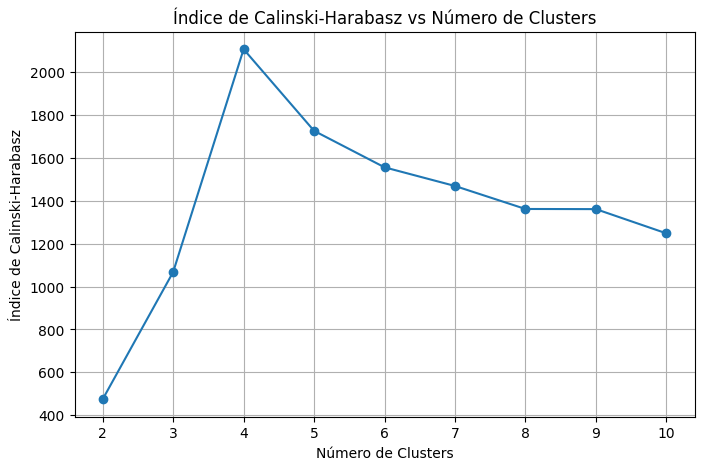

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score
from sklearn.datasets import make_blobs

# Generar un conjunto de datos de ejemplo
X, _ = make_blobs(n_samples=500, centers=4, cluster_std=0.6, random_state=0)

# Probar con diferentes números de clusters y calcular el índice de Calinski-Harabasz
calinski_scores = []
cluster_range = range(2, 11)
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(X)
    score = calinski_harabasz_score(X, labels)
    calinski_scores.append(score)

# Graficar el índice de Calinski-Harabasz para cada número de clusters
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, calinski_scores, marker='o')
plt.title("Índice de Calinski-Harabasz vs Número de Clusters")
plt.xlabel("Número de Clusters")
plt.ylabel("Índice de Calinski-Harabasz")
plt.grid()
plt.show()



### Explicación del Código

1. **`make_blobs`**: genera datos de ejemplo con 4 centros para realizar clustering.
2. **Bucle `for` sobre `cluster_range`**: ajusta el modelo K-Means y calcula el índice de Calinski-Harabasz para cada número de clusters.
3. **`calinski_harabasz_score`**: calcula el índice de Calinski-Harabasz para la agrupación resultante, lo cual ayuda a evaluar la calidad de la agrupación.
4. **Gráfico**: muestra cómo cambia el índice a medida que varía el número de clusters.

### Interpretación del Gráfico

- El número de clusters que maximiza el índice de Calinski-Harabasz (donde el valor es mayor) es generalmente el óptimo, pues indica que los clusters son lo más compactos posible y están bien separados.
  
En este ejemplo, al observar el gráfico, se puede identificar el mejor número de clusters según el pico más alto en el índice, indicando el número de clusters donde la agrupación es de mayor calidad.

# **DAVIES-BOULDIN**

El **índice de Davies-Bouldin** es una métrica de evaluación para análisis de clusters que mide la **calidad de la agrupación** considerando la dispersión dentro de cada cluster y la separación entre clusters. Es útil para determinar si los clusters están bien definidos y separados.

### Definición del Índice de Davies-Bouldin

El índice de Davies-Bouldin (DB) se calcula como el promedio de la **"peor" similitud** entre cada cluster y el cluster más cercano. Una similitud baja indica una buena agrupación, ya que implica que los clusters están bien separados y son internamente coherentes.

**Interpretación:** Un **índice Davies-Bouldin más bajo** indica clusters más compactos y bien separados, lo que sugiere una mejor calidad de la agrupación.

### Ventajas del Índice Davies-Bouldin

1. **Intuitivo**: un índice bajo sugiere una buena separación y cohesión entre clusters.
2. **Automatizado**: el cálculo está basado en la geometría de los clusters, sin requerir intervención manual.
3. **No necesita etiquetas**: como muchas métricas de clustering, funciona sin datos etiquetados, útil para evaluar agrupaciones no supervisadas.

### Limitaciones del Índice Davies-Bouldin

1. **Forma de clusters**: funciona mejor con clusters de forma esférica o bien separados; para clusters de forma compleja, puede no ser adecuado.
2. **Sensibilidad a la métrica de distancia**: el valor del índice puede depender de la métrica de distancia utilizada, como Euclídea, Manhattan, etc.
3. **Número de clusters**: a menudo, el índice disminuye al aumentar el número de clusters, lo que puede llevar a un sesgo en cuanto al número óptimo de clusters.


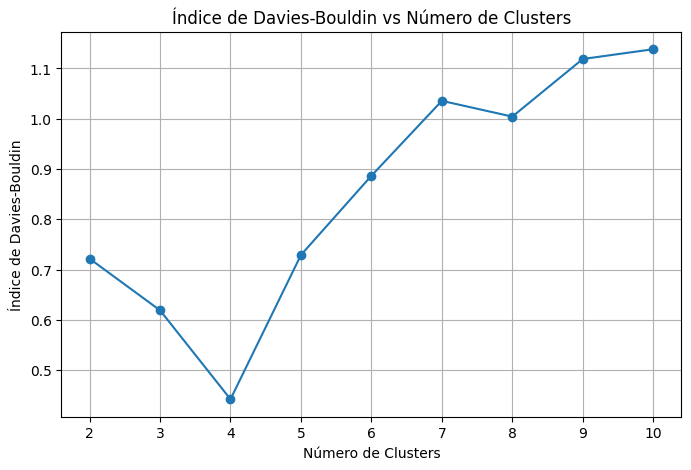

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.datasets import make_blobs

# Generar datos de ejemplo
X, _ = make_blobs(n_samples=500, centers=4, cluster_std=0.6, random_state=0)

# Probar con diferentes números de clusters y calcular el índice de Davies-Bouldin
db_scores = []
cluster_range = range(2, 11)
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(X)
    score = davies_bouldin_score(X, labels)
    db_scores.append(score)

# Graficar el índice de Davies-Bouldin para cada número de clusters
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, db_scores, marker='o')
plt.title("Índice de Davies-Bouldin vs Número de Clusters")
plt.xlabel("Número de Clusters")
plt.ylabel("Índice de Davies-Bouldin")
plt.grid()
plt.show()



### Explicación del Código

1. **`make_blobs`**: genera datos de ejemplo con 4 centros para realizar clustering.
2. **Bucle `for` sobre `cluster_range`**: ajusta el modelo K-Means y calcula el índice de Davies-Bouldin para cada número de clusters.
3. **`davies_bouldin_score`**: calcula el índice de Davies-Bouldin para la agrupación resultante.
4. **Gráfico**: muestra cómo cambia el índice a medida que varía el número de clusters.

### Interpretación del Gráfico

- El número de clusters que minimiza el índice de Davies-Bouldin es generalmente el óptimo, ya que indica una agrupación con clusters compactos y bien separados.
  
Este ejemplo es útil para evaluar cuál número de clusters puede ser adecuado para un conjunto de datos, ya que un valor bajo del índice Davies-Bouldin sugiere una mejor calidad de agrupación.

In [ ]:
from sklearn import metrics
# Generamos los scores
Silueta = metrics.silhouette_score(X, labels)
Calinski_Harabasz = metrics.calinski_harabasz_score(X, labels)
Davies_Bouldin = metrics.davies_bouldin_score(X, labels)
# Imprimimos los scores
print("Score Analísis de silueta: ", Silueta)
print("Score indice Calinski-Harabasz : ", Calinski_Harabasz)
print("Score indice Davies-Bouldin: ", Davies_Bouldin)

Score Analísis de silueta:  0.3103907618338623
Score indice Calinski-Harabasz :  1248.0667970909456
Score indice Davies-Bouldin:  1.138206386304499
